In [ ]:
!pip install python_igraph
!sudo apt install libcairo2-dev pkg-config python3-dev
!pip install pycairo
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 23.3 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.10.2-py3-none-any.whl size=9074 sha256=9ea70e4375817a2e52f797595cdd8aa053d45eaba66200677dd60d13c210e5b4
  Stored in directory: /root/.cache/pip/wheels/74/1d/33/83ec153aa37c92957b2edb888f4f42fdea9b7ac89f4b919391
Successfully built python-igraph
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcair

IGRAPH U--- 5 4 --
+ edges:
0--1 0--2 1--2 2--4
[2, 2, 3, 0, 1]


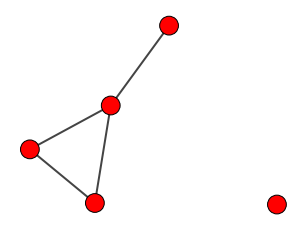

In [ ]:
import igraph
import cairo
import matplotlib.pyplot as plt
g = igraph.Graph([(0, 1), (0, 2), (1, 2), (2, 4)])
print(g)
print(g.degree())
igraph.plot(g, target=plt.axes())

In [ ]:
import sys
from igraph import Graph, mean
from igraph import VertexSeq
from igraph import EdgeSeq
from igraph import summary
from igraph import plot
from igraph import GraphBase
import igraph
from igraph import VertexClustering
from igraph import clustering
from igraph.drawing.utils import autocurve
import time
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy
import scipy.cluster.hierarchy as sch
import cairo
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from functools import reduce
from operator import concat

In [ ]:
#Edit Distance
def levenshteinDistance(s1,s2):	
  if len(s1) > len(s2):
    s1,s2 = s2,s1
  distances = range(len(s1) + 1) #output: list has range from 0 to len(s2)+1
  for index2,char2 in enumerate(s2):
    newDistances = [index2+1]
    for index1,char1 in enumerate(s1):
      if char1 == char2:
        newDistances.append(distances[index1])
      else:
        newDistances.append(1 + min((distances[index1],
                                     distances[index1+1],
                                     newDistances[-1])))
    distances = newDistances
  return distances[-1]

In [ ]:
s1 = 'TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATCGTTCCTCTAGGTGCTGTCACATACCCAAAGATTGCCAGGCTCCGCGCCGTGGAGCAGCAGCCAGCAGCGCCCCCGCCTCCACCCGGGGCGCGCAGAGCCCTGACAAGTCACTGGCAGCAACAGTCTTACCTGGACTCTGGAATCCATTCTGGTGCCACTACCACAGCTCCTTCTCTGTCTGTTCCGAACAACGCCACACCCCGGTTCGCAGCATGGCGCAGTTAGGCCCGGGGCCGGCCGGCGAGCTCCGCGGAGCGGGCTCCCCGCGGGGGGGGGGGGGGCCGCAGCCCCGCTCAGGCCCAGGCCGCGCCGGCGCAGCGGAGGGGACGCACGGGGGCGGGGGGCAGCGGCACGGCGACTGGCGGGGCTCCCGCGGGGCCGCCCAGGCCACCCGGCCCGCCCGCAGTCGCGGCGGCCAGCCGCGGGATCGGTTGTCCCTGAGACAAAGTGACCAGGCAAGAGATGGTGGTTCCCTTCTCTCCGGCCTTCGCCAGGTATCTGTCTTTGATCCTTTTTTCTTGGCTTGGGTGTCGGAGGAGAAATGCTAAAGATGCCATACTGCCGGCGGAACGGCTTTCTACAGTACAAGTGGGGCAGGGCCGCATAAATATACGCTGAGCCATCTGTCTCGTGACGTTCGGATCGCCCGGTGGCCCCCCCGTCCACCCGCGGATGCCCCGCGGAACAAAGGCCCCCACTGCCGCCAGGCGGCCCCCCCATGTGTCTT'
s2 = 'TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATCGTTCCTCTAGGTGCTGTCACATACCCAAAGATTGCCAGGCTCCGCGCCGTGGAGCAGCAGCCAGCAGCGCCCCCGCCTCCACCCGGGGCGCGCAGAGCCCTGACAAGTCACTGGCAGCAACAGTCTTACCTGGACTCTGGAATCCATTCTGGTGCCACTACCACAGCTCCTTCTCTGTCTGTTCCGAACAACGCCACACCCCGGTTCGCAGCATGGCGCAGTTAGGCCCGGGGCCGGCCGGCGAGCTCCGCGGAGCGGGCTCCCCGCGGGGGGGGGGGGGGCCGCAGCCCCGCTCAGGCCCAGGCCGCGCCGGCGCAGCGGAGGGGACGCACGGGGGCGGGGGGCAGCGGCACGGCGACTGGCGGGGCTCCCGCGGGGCCGCCCAGGCCACCCGGCCCGCCCGCAGTCGCGGCGGCTAGCCGCGGGATCGGTTGTCCCTGAGACAAAGTGACCAGGCAAGAGATGGTGGTTCCCTTCTCTCCGGCCTTCGCCAGGTATCTGTCTTTGATCCTTTTTTCTTGGCTTGGGTGTCGGAGGAGAAATGCTAAAGATGCCATACTGCCGGCGGAACGGCTTTCTACAGTACAAGTGGGGCAGGGCCGCATAAATATACGCTGAGCCATCTGTCTCGTGACGTTCGGATCGCCCGGTGGCCCCCCCGTCCACCCGCGGATGCCCCGCGGAACAAAGGCCCCCACTGCCGCCAGGCGGCCCCCCCATGTGTCTT'

In [ ]:
levenshteinDistance(s1, s2)

1

In [ ]:
#bounded edit distance 
def levenshteinDistanceThresh(s1,s2,k):
#    print "LD:", k
#    print s1
#    print s2
  #from Bio.SubsMat import MatrixInfo as matlist
  #matrix = matlist.blosum62

  if len(s1) > len(s2):
    s1,s2 = s2,s1
  distances = range(len(s1) + 1)
  for index2,char2 in enumerate(s2):
    newDistances = [index2+1]
    for index1,char1 in enumerate(s1):
      if abs(index1-index2) > k:
        newDistances.append(sys.maxsize)
      elif char1 == char2:
        newDistances.append(distances[index1])
      else:
        newDistances.append(1 + min((distances[index1],distances[index1+1],newDistances[-1])))	
    distances = newDistances

    if min(distances)>k:
      return sys.maxsize		
  return distances[-1]

In [ ]:
print(levenshteinDistanceThresh(s1,s2,3))
print(levenshteinDistanceThresh(s1,s2,1))
print(f'maximum value: {sys.maxsize}')

2
9223372036854775807
maximum value: 9223372036854775807


In [ ]:
from Bio.SubsMat import MatrixInfo as matlist
from Bio import pairwise2
matrix = matlist.blosum62

/usr/local/lib/python3.7/dist-packages/Bio/SubsMat/__init__.py:131: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  BiopythonDeprecationWarning,


In [ ]:
print(matrix)

{('W', 'F'): 1, ('L', 'R'): -2, ('S', 'P'): -1, ('V', 'T'): 0, ('Q', 'Q'): 5, ('N', 'A'): -2, ('Z', 'Y'): -2, ('W', 'R'): -3, ('Q', 'A'): -1, ('S', 'D'): 0, ('H', 'H'): 8, ('S', 'H'): -1, ('H', 'D'): -1, ('L', 'N'): -3, ('W', 'A'): -3, ('Y', 'M'): -1, ('G', 'R'): -2, ('Y', 'I'): -1, ('Y', 'E'): -2, ('B', 'Y'): -3, ('Y', 'A'): -2, ('V', 'D'): -3, ('B', 'S'): 0, ('Y', 'Y'): 7, ('G', 'N'): 0, ('E', 'C'): -4, ('Y', 'Q'): -1, ('Z', 'Z'): 4, ('V', 'A'): 0, ('C', 'C'): 9, ('M', 'R'): -1, ('V', 'E'): -2, ('T', 'N'): 0, ('P', 'P'): 7, ('V', 'I'): 3, ('V', 'S'): -2, ('Z', 'P'): -1, ('V', 'M'): 1, ('T', 'F'): -2, ('V', 'Q'): -2, ('K', 'K'): 5, ('P', 'D'): -1, ('I', 'H'): -3, ('I', 'D'): -3, ('T', 'R'): -1, ('P', 'L'): -3, ('K', 'G'): -2, ('M', 'N'): -2, ('P', 'H'): -2, ('F', 'Q'): -3, ('Z', 'G'): -2, ('X', 'L'): -1, ('T', 'M'): -1, ('Z', 'C'): -3, ('X', 'H'): -1, ('D', 'R'): -2, ('B', 'W'): -4, ('X', 'D'): -1, ('Z', 'K'): 1, ('F', 'A'): -2, ('Z', 'W'): -3, ('F', 'E'): -3, ('D', 'N'): 1, ('B', 'K'

In [ ]:
fake_breast_seq_data = [
    ['TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATCGTTCCTCTAGGTGCTGTCACATACCCAAAGATTGCCAGGCTCCGCGCCGTGGAGCAGCAGCCAGCAGCGCCCCCGCCTCCACCCGGGGCGCGCAGAGCCCTGACAAGTCACTGGCAGCAACAGTCTTACCTGGACTCTGGAATCCATTCTGGTGCCACTACCACAGCTCCTTCTCTGTCTGTTCCGAACAACGCCACACCCCGGTTCGCAGCATGGCGCAGTTAGGCCCGGGGCCGGCCGGCGAGCTCCGCGGAGCGGGCTCCCCGCGGGGGGAGGGGGGGCCGCAGCCCCGCTCAGGCCCAGGCCGCGCCGGCGCAGCGGAGGGGACGCACGGGGGCGGGGGGCAGCGGCACGGCGACTGGCGGGGCTCCCGCGGGGCCGCCCAGGCCACCCGGCCCGCCCGCAGTCGCGGCGGCCAGCCGCGGGATCGGTTGTCCCTGAGACAAAGTGACCAGGCAAGAGATGGTGGTTCCCTTCTCTCCGGCCTTCGCCAGGTATCTGTCTTTGATCCTTTTTTCTTGGCTTGGGTGTCGGAGGAGAAATGCTAAAGATGCCATACTGCCGGCGGAACGGCTTTCTACAGTACAAGTGGGGCAGGGCCGCATAAATATACGCTGAGCCATCTGTCTCGTGACGTTCGGATCGCCCGGTGGCCCCCCCGTCCACCCGCGGATGCCCCGCGAAACAAAGGCCCCCACTGCCGCCAGGCGGCCCCCCCATGTGTCTT'],
    ['TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATCGTTCCTCTAGGTGCTGTCACATACCCAAAGATTGCCAGGCTCCGCGCCGTGGAGCAGCAGCCAGCAGCGCCCCCGCCTCCACCCGGGGCGCGCAGAGCCCTGACAAGTCACTGGCAGCAACAGTCTTACCTGGACTCTGGAATCCATTCTGGTGCCACTACCACAGCTCCTTCTCTGTCTGTTCCGAACAACGCCACACCCCGGTTCGCAGCATGGCGCAGTTAGGCCCGGGGCCGGCCGGCGAGCTCCGCGGAGCGGGCTCCCCGCGGGGGGGGGGGGGGCCGCAGCCCCGCTCAGGCCCAGGCCGCGCCGGCGCAGCGGAGGGGACGCACGGGGGCGGGGGGCAGCGGCACGGCGACTGGCGGGGCTCCCGCGGGGCCGCCCAGGCCACCCGGCCCGCCCGCAGTCGCGGCGGCCAGCCGCGGGATCGGTTGTCCCTGAGACAAAGTGACCAGGCAAGAGATGGTGGTTCCCTTCTCTCCGGCCTTCGCCAGGTATCTGTCTTTGATCCTTTTTTCTTGGCTTGGGTGTCGGAGGAGAAATGCTAAAGATGCCATACTGCCGGCGGAACGGCTTTCTACAGTACAAGTGGGGCAGGGCCGCATAAATATACGCTGAGCCATCTGTCTCGTGACGTTCGGATCGCCCGGTGGCCCCCCCGTCCACCCGCGGATGCCCCGCGGAACAAAGGCCCCCACTGCCGCCAGGCGGCCCCCCCATGTGTCTT'],
    ['TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATCGTTCCTCTAGGTGCTGTCACATACCCAAAGATTGCCAGGCTCCGCGCCGTGGAGCAGCAGCCAGCAGCGCCCCCGCCTCCACCCGGGGCGCGCAGAGCCCTGACAAGTCACTGGCAGCAACAGTCTTACCTGGACTCTGGAATCCATTCTGGTGCCACTACCACAGCTCCTTCTCTGTCTGTTCCGAACAACGCCACACCCCGGTTCGCAGCATGGCGCAGTTAGGCCCGGGGCCGGCCGGCGAGCTCCGCGGAGCGGGCTCCCCGCGGGGGGGGGGGGGGCCGCAGCCCCGCTCAGGCCCAGGCCGCGCCGGCGCAGCGGAGGGGACGCACGGGGGCGGGGGGCAGCGGCACGGCGACTGGCGGGGCTCCCGCGGGGCCGCCCAGGCCACCCGGCCCGCCCGCAGTCGCGGCGGCCAGCCGCGGGATCGGTTGTCCCTGAGACAAAGTGACCAGGCAAGAGATGGTGGTTCCCTTCTCTCCGGCCTTCGCCAGGTATCTGTCTTTGATCCTTTTTTCTTGGCTTGGGTGTCGGAGGAGAAATGCTAAAGATGCCATACTGCCGGCGGAACGGCTTTCTACAGTACAAGTGGGGCAGGGCCGCATAAATATACGCTGAGCCATCTATCTCGTGACGTTCGGATCGCCCGGTGGCCCCCCCGTCCACCCGCGGATGCCCCGCGGAACAAAGGCCCCCACTGCCGCCAGGCGGCCCCCCCATGTGTCTT'],
    ['TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATCGTTCCTCTAGGTGCTGTCACATACCCAAAGATTGCCAGGCTCCGCGCCGTGGAGCAGCAGCCAGCAGCGCCCCCGCCTCCACCCGGGGCGCGCAGAGCCCTGACAAGTCACTGGCAGCAACAGTCTTACCTGGACTCTGGAATCCATTCTGGTGCCACTACCACAGCTCCTTCTCTGTCTGTTCCGAACAACGCCACACCCCGGTTCGCAGCATGGCGCAGTTAGGCCCGGGGCCGGCCGGCGAGCTCCGCGGAGCGGGCTCCCCGCGGGGGGGGGGGGGGCCGCAGCCCCGCTCAGGCCCAGGCCGCGCCGGCGCAGCGGAGGGGACGCACGGGGGCGGGGGGCAGCGGCACGGCGACTGGCGGGGCTCCCGCGGGGCCGCCCAGGCCACCCGGCCCGCCCGCAGTCGCGGCGGCCAGCCGCGGGATCGGTTGTCCCTGAGACAAAGTGACCAGGCAAGAGATGGTGGTTCCCTTCTCTCCGGCCTTCGCCAGGTATCTGTCTTTGATCCTTTTTTCTTGGCTTGGGTGTCGGAGGAGAGATGCTAAAGATGCCATACTGCCGGCGGAACGGCTTTCTACAGTACAAGTGGGGCAGGGCCGCATAAATATACGCTGAGCCATCTGTCTCGTGACGTTCGGATCGCCCGGTGGCCCCCCCGTCCACCCGCGGATGCCCCGCGGAACAAAGGCCCCCACTGCCGCCAGGCGGCCCCCCCATGTGTCTT'],
    ['TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATCGTTCCTCTAGGTGCTGTCACATACCCAAAGATTGCCAGGCTCCGCGCCGTGGAGCAGCAGCCAGCAGCGCCCCCGCCTCCACCCGGGGCGCGCAGAGCCCTGACAAGTCACTGGCAGCAACAGTCTTACCTGGACTCTGGAATCCATTCTGGTGCCACTACCACAGCTCCTTCTCTGTCTGTTCCGAACAACGCCACACCCCGGTTCGCAGCATGGCGCAGTTAGGCCCGGGGCCGGCCGGCGAGCTCCGCGGAGCGGGCTCCCCGCGGGGGGGGGGGGGGCCGCAGCCCCGCTCAGGCCCAGGCCGCGCCGGCGCAGCGGAGGGGACGCACGGGGGCGGGGGGCAGCGGCACGGCGACTGGCGGGGCTCCCGCGGGGCCGCCCAGGCCACCCGGCCCGCCCGCAGTCGCGGCGGCCAGCCGCGGGATCGGTTGTCCCTGAGACAAAGTGACCAGGCAAGAGATGGTGGTTCCCTTCTCTCCGGCCTTCGCCAGGTATCTGTCTTTGATCCTTTTTTCTTGGCTTGGGTGTCGGAGGAGAAATGCTAAAGATGCCATACTGCCGGCGGAACGGCTTTCTACAGTACAAGTGGGGCAGGGCCGCATAAATATACGCTGAGCCATCTGTCCCGTGACGTTCGGATCGCCCGGTGGCCCCCCCGTCCACCCGCGGATGCCCCGCGGAACAAAGGCCCCCACTGCCGCCAGGCGGCCCCCCCATGTGTCTT'],
    ['TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATCGTTCCTCTAGGTGCTGTCACATACCCAAAGATTGCCAGGCTCCGCGCCGTGGAGCAGCAGCCAGCAGCGCCCCCGCCTCCACCCGGGGCGCGCAGAGCCCTGACAAGTCACTGGCAGCAACAGTCTTACCTGGACTCTGGAATCCATTCTGGTGCCACTACCACAGCTCCTTCTCTGTCTGTTCCGAACAACGCCACACCCCGGTTCGCAGCATGGCGCAGTTAGGCCCGGGGCCGGCCGGCGAGCTCCGCGGAGCGGGCTCCCCGCGGGGGGGGGGGGGGCCGCAGCCCCGCTCAGGCCCAGGCCGCGCCGGCGCAGCGGAGGGGACGCACGGGGGCGGGGGGCAGCGGCACGGCGACTGGCGGGGCTCCCGCGGGGCCGCCCAGGCCACCCGGCCCGCCCGCAGTCGCGGCGGCCAGCCGCGGGATCGGTTGTCCCTGAGACAAAGTGACCAGGCAAGAGATGGTGGTTCCCTTCTCTCCGGCCTTCGCCAGGTATCTGTCTTTGATCCTTTTTTCTTGGCTTGGGTGTCGAAGGAGAAATGCTAAAGATGCCATACTGCCGGCGGAACGGCTTTCTACAGTACAAGTGGGGCAGGGCCGCATAAATATACGCTGAGCCATCTGTCTCGTGACGTTCGGATCGCCCGGTGGCCCCCCCGTCCACCCGCGGATGCCCCGCGGAACAAAGGCCCCCACTGCCGCCAGGCGGCCCCCCCATGTGTCTT'],
    ['TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATCGTTCCTCTAGGTGCTGTCACATACCCAAAGATTGCCAGGCTCCGCGCCGTGGAGCAGCAGCCAGCAGCGCCCCCGCCTCCACCCGGGGCGCGCAGAGCCCTGACAAGTCACTGGCAGCAACAGTCTTACCTGGACTCTGGAATCCATTCTGGTGCCACTACCACAGCTCCTTCTCTGTCTGTTCCGAACAACGCCACACCCCGGTTCGCAGCATGGCGCAGTTAGGCCCGGGGCCGGCCGGCGAGCTCCGCGGAGCGGGCTCCCCGCGGGGGGGGGGGGGGCCGCAGCCCCGCTCAGGCCCAGGCCGCGCCGGCGCAGCGGAGGGGACGCACGGGGGCGGGGGGCAGCGGCACGGCGACTGGCGGGGCTCCCGCGGGGCCGCCCAGGCCACCCGGCCCGCCCGCAGTCGCGGCGGCCAGCCGCGGGATCGGTTGTCCCTGAGACAAAGTGACCAGGCAAGAGATGGTGGTTCCCTTCTCTCCGGCCTTCGCCAGGTATCTGTCTTTGATCCTTTTTTCTTGGCTTGGGTGTCGGAGGAGAAATGCTAAAGATGCCATACTGCCGGCGGAACGGCTTTCTACAGTACAAGTGGGGCAGGGCCGCATAAATATACGCTGAGCCATCTGTCTTGTGACGTTCGGATCGCCCGGTGGCCCCCCCGTCCACCCGCGGATGCCCCGCGGAACAAAGGCCCCCACTGCCGCCAGGCGGCCCCCCCATGTGTCTT']
]

In [ ]:
def createMinMatrix(species, useBoundedLD=False):
    #print("started creatMinMatrix")
    #from Bio.SubsMat import MatrixInfo as matlist
    #from Bio import pairwise2
    #matrix = matlist.blosum62
	#print(matrix)
  skippedCells=0	
  repeatmatrix=[]
  its=(len(species)*len(species))/2
  it=len(species)
  #print("its=",its)
  #print("it=",it)
  for row in range(len(species)):
    #Add new row to matrix
    repeatmatrix.append([])
    repeatmatrix[row].extend([sys.maxsize]*len(species))
    #print(repeatmatrix)
  for row in range(len(species)):
    #print "row:", row
    if row>0:
      print("Percent complete:", round((it*1.0)/its,3))
      #calculate ranges
      maxED=[]
      minED=[]
      if row>1:
        rowMin=min(repeatmatrix[row][0:row-1])
        #print repeatmatrix[row][0:row-1]
        #print rowMin
      else:
        rowMin=sys.maxsize
			
      for col in range(row+1,len(species)):
        minED.append(abs(repeatmatrix[0][col]-repeatmatrix[0][row]))
        maxED.append(repeatmatrix[0][col]+repeatmatrix[0][row])
			#then only compare possible mins
			#print row, len(minED)
			
      if len(maxED)>0:
        lowestMax = min(maxED)
      else:
        lowestMax = sys.maxsize
        #print lowestMax
			
      for col in range(row+1,len(species)):
        it+=1
        colMin = min(repeatmatrix[col])
        #print colMin
        #if col - (row+1) < 0:
        #print "ERROR"
        if (minED[col-(row+1)] > lowestMax or minED[col-(row+1)] > rowMin) and (minED[col-(row+1)] > colMin): 
          repeatmatrix[row][col]=sys.maxsize
          repeatmatrix[col][row]=sys.maxsize
					#print "skipping ", row, col
          skippedCells+=1
        else:
          if useBoundedLD == True:
            repeatmatrix[row][col]=levenshteinDistanceThresh(species[row][0],species[col][0], max(colMin,rowMin))
					  #repeatmatrix[row][col]=pairwise2.align.globaldx(species.repeats[row].sequence.upper(), species.repeats[col].sequence.upper(), matrix, score_only=True, one_alignment_only=True)
            if repeatmatrix[row][col] > max(colMin,rowMin):
              repeatmatrix[row][col]=sys.maxsize
              #print max(colMin,rowMin)
          else:
            repeatmatrix[row][col]=levenshteinDistance(species[row][0],species[col][0])
              #repeatmatrix[row][col]=pairwise2.align.globaldx(species.repeats[row].sequence.upper(), species.repeats[col].sequence.upper(), matrix, score_only=True, one_alignment_only=True)
          repeatmatrix[col][row]=repeatmatrix[row][col]
            #if repeatmatrix[row][col] == 0:
              #print "WARNING!!!"
          if repeatmatrix[row][col] < rowMin:
            rowMin=repeatmatrix[row][col]

    else:
      for col in range(len(species)):
        repeatmatrix[row][col]=levenshteinDistance(species[row][0],species[col][0])
        #repeatmatrix[row][col]=pairwise2.align.globaldx(species.repeats[row].sequence.upper(), species.repeats[col].sequence.upper(), matrix, score_only=True, one_alignment_only=True)
        #print repeatmatrix[col][row]
        repeatmatrix[col][row]=repeatmatrix[row][col]
      repeatmatrix[0][0] = sys.maxsize

  #print("Skipped computing", skippedCells, "of", ((len(species)*len(species))-len(species))/2, "cells")
  return repeatmatrix

In [ ]:
def look_better(matrix):
  #matrix = matrix[float('inf') if i==sys.maxsize else i for i in matrix]
  for i in range(len(matrix)):
    matrix[i] = list(map(lambda x: 'N' if x == sys.maxsize else x, matrix[i]))
  return matrix

In [ ]:
look_better(createMinMatrix(fake_breast_seq_data))

Percent complete: 0.286
Percent complete: 0.49
Percent complete: 0.653
Percent complete: 0.776
Percent complete: 0.857
Percent complete: 0.898


[[inf, 2, 3, 3, 3, 3, 3],
 [2, inf, 1, 1, 1, 1, 1],
 [3, 1, inf, 2, 2, 2, 2],
 [3, 1, 2, inf, 2, 2, 2],
 [3, 1, 2, 2, inf, 2, 2],
 [3, 1, 2, 2, 2, inf, 2],
 [3, 1, 2, 2, 2, 2, inf]]

In [ ]:
look_better(createMinMatrix(fake_breast_seq_data, True))

Percent complete: 0.286
Percent complete: 0.49
Percent complete: 0.653
Percent complete: 0.776
Percent complete: 0.857
Percent complete: 0.898


[[inf, 2, 3, 3, 3, 3, 3],
 [2, inf, 1, 1, 1, 1, 1],
 [3, 1, inf, 2, 2, 2, 2],
 [3, 1, 2, inf, inf, inf, inf],
 [3, 1, 2, inf, inf, inf, inf],
 [3, 1, 2, inf, inf, inf, inf],
 [3, 1, 2, inf, inf, inf, inf]]

In [ ]:
def getMinED(repeatmatrix, row, minVal):
#	minVal=sys.maxint
	
	#print repeatmatrix
	ret=[]
	
	for col in range(len(repeatmatrix[row])):
#		#print "a"
#		if repeatmatrix[row][col] < minVal:
#			minVal = repeatmatrix[row][col]
#			ret = [(row,col)]
#		elif repeatmatrix[row][col] == minVal:
		if repeatmatrix[row][col] == minVal:
			ret.append((row,col))
		if repeatmatrix[row][col] < minVal and repeatmatrix[row][col] < 0:
			print("Warning, min passed was wrong")
			ret = [(row,col)]
			minVal=repeatmatrix[row][col] 
	
	#print minVal
	#print ret
	return ret

In [ ]:
test_matrix = createMinMatrix(fake_breast_seq_data)

Percent complete: 0.286
Percent complete: 0.49
Percent complete: 0.653
Percent complete: 0.776
Percent complete: 0.857
Percent complete: 0.898


In [ ]:
for row in range(len(fake_breast_seq_data)):
  m = min(l for l in test_matrix[row] if l > 0)
  edgeTo = getMinED(test_matrix, row, m)
  print(edgeTo)

[(0, 1)]
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]
[(2, 1)]
[(3, 1)]
[(4, 1)]
[(5, 1)]
[(6, 1)]


In [ ]:
def getSparseMinED(repeatmatrix, row, minVal):
#	minVal=sys.maxint
	
	#print repeatmatrix
	ret=[]
	
	for col in range(len(repeatmatrix[row])):
#		#print "a"
#		if repeatmatrix[row][col] < minVal:
#			minVal = repeatmatrix[row][col]
#			ret = [(row,col)]
#		elif repeatmatrix[row][col] == minVal:
		if repeatmatrix[row,col] == minVal:
			ret.append((row,col))
		if repeatmatrix[row,col] < minVal and repeatmatrix[row,col] < 0:
			print("Warning, min passed was wrong")
			ret = [(row,col)]
			minVal=repeatmatrix[row,col] 
	
	#print minVal
	#print ret
	return ret

In [ ]:
row = np.array([0,0,1,3,1,0,0])
col = np.array([0,2,1,3,1,0,0])
data = np.array([1,1,1,1,1,1,1])
coordination = scipy.sparse.coo_matrix((data, (row, col)), shape=(max(row)+1, max(col)+1))
print(coordination)

  (0, 0)	1
  (0, 2)	1
  (1, 1)	1
  (3, 3)	1
  (1, 1)	1
  (0, 0)	1
  (0, 0)	1


In [ ]:
for row in range(4):
  m = min(list(scipy.sparse.find(coordination.tocsc()[:,row])[2]) + list(scipy.sparse.find(coordination.tocsc()[row,:])[2]))
  edgeTo = getSparseMinED(coordination.todense(), row, m)
  print(edgeTo)

[]
[]
[]
[]


In [ ]:
#DiWANN graph construction
def makeGraphEfficiently(num_species, repeatmatrix, names_list, sparse=False):
	
	G = Graph(directed=True)
	G.add_vertices(num_species)
	G.vs["label"] = names_list
	G.vs["name"] = names_list
	G.vs["color"] = num_species*["blue"]
	
	for row in range(num_species):
		#populate graph
		if sparse==True:
			m=min(list(scipy.sparse.find(repeatmatrix.tocsc()[:,row])[2]) + list(scipy.sparse.find(repeatmatrix.tocsc()[row,:])[2]))
			edgeTo = getSparseMinED(repeatmatrix, row, m)
		else:
			m=min(l for l in repeatmatrix[row] if l > 0)
			edgeTo = getMinED(repeatmatrix, row, m)
		#print edgeTo
		for e in edgeTo:
			G.add_edge(e[0], e[1], weight=m, width=5/m, arrow_size=0.005)
		
	G.simplify(combine_edges=min)
	summary(G)
	return G

In [ ]:
def convert_list_2d(list_1d):
  converted_list=[]
  for i in list_1d:
    converted_list.append([i])
  return converted_list

In [ ]:
def check_matrix_shape(matrix):
  print(f'shape = ({len(matrix)}, {len(matrix[0])})')
  return None

In [ ]:
def gene_split(list_gene):
  list_splited_gene = []
  for gene in list_gene:
    list_splited_gene.append(gene.split(", "))
  list_splited_gene = reduce(concat, list_splited_gene)
  return list_splited_gene

def find_key_gene(network, dataframe, dfs):
  list_key_vertice_index = []
  seq = network.vs.select(_degree = network.maxdegree())
  list_key_vertice_index.append([v.index for v in seq])
  seq = network.vs.select(_betweenness = max(network.betweenness()))
  list_key_vertice_index.append([v.index for v in seq])
  list_key_vertice_index = reduce(concat, list_key_vertice_index)
  list_neighlist_key_vertice_indexbors = [*set(list_key_vertice_index)]
  list_neighbors = []
  #list_neighbors.append(list_maxdegree_node["name"])
  for index in list_key_vertice_index:
    list_neighbors.append([network.vs[index]["name"]])
    if dfs:
      neis = network.dfs(index, mode="out")
      network.vs[neis[0]]["color"] = len(neis[0])*["red"]
      list_neighbors.append(network.vs[neis[0]]["name"])
    else:
      neis = network.neighbors(index, mode="out")
      network.vs[neis]["color"] = len(neis)*["red"]
      list_neighbors.append(network.vs[neis]["name"])
  list_neighbors = reduce(concat, list_neighbors)
  list_neighbors = [*set(list_neighbors)]
  print(sorted(list_neighbors))
  list_tumor_gene = dataframe[dataframe['Donor_ID'].isin(sorted(list_neighbors))]['tumor_gene_uni'].tolist()
  list_tumor_gene = gene_split(list_tumor_gene)
  print(f'The top one key tumor gene: {max(list_tumor_gene, key=list_tumor_gene.count)}')
  return dict(Counter(list_tumor_gene))

def gen_key_gene_df(key_gene_dict):
  gene_name_tolower = [s.lower() for s in list(key_gene_dict.keys())]
  tumor_gene_dict = {"SYMBOL":gene_name_tolower, "SCORE":list(key_gene_dict.values())}
  tumor_gene_df = pd.DataFrame(tumor_gene_dict)
  return tumor_gene_df

In [ ]:
def make_donorID_degree_df(list_donor_ID, list_degree):
  df = pd.DataFrame({
      'Donor_ID': list_donor_ID,
      'degree': list_degree
  })
  return df

In [ ]:
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
DiWANN = makeGraphEfficiently(len(fake_breast_seq_data), test_matrix, names)

IGRAPH D-W- 7 11 -- 
+ attr: label (v), arrow_size (e), weight (e), width (e)


[1, 11, 2, 2, 2, 2, 2]


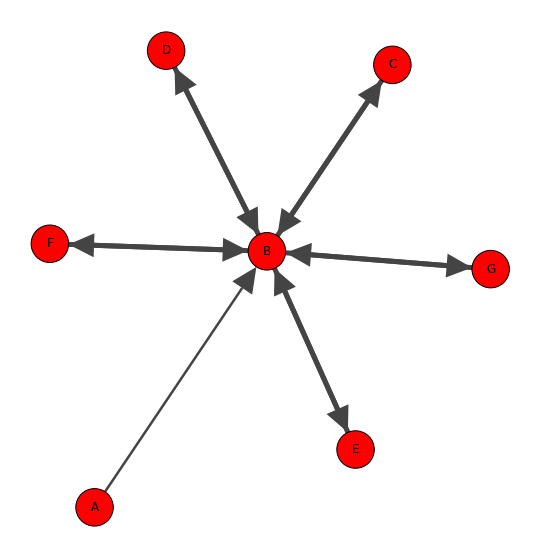

In [ ]:
print(DiWANN.degree())
plt.figure(figsize=(10, 10))
igraph.plot(DiWANN, target=plt.axes(), autocurve=False)

In [ ]:
df_donor_art_seq = pd.read_csv('drive/MyDrive/Colab Notebooks/donor_art_seq_468.csv')
print(df_donor_art_seq)
df_donor_gene_tissue = pd.read_csv('drive/MyDrive/Colab Notebooks/icgc_468_gene_tissue.csv')
print(df_donor_gene_tissue)

    sample id                                                seq  seq_len
0      DO1001  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773
1      DO1002  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773
2      DO1005  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773
3      DO1007  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773
4      DO1010  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773
..        ...                                                ...      ...
463   DO52747  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773
464   DO52753  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773
465   DO52760  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773
466   DO52763  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773
467    DO6398  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773

[468 rows x 3 columns]
     label Donor_ID  tumor_gene_uni   tissue
0        0   DO1001    GRIN2A, TP53   Breas

In [ ]:
df_donor_art_seq.rename(columns={'sample id':'Donor_ID'}, inplace=True)
df_donor_gene_tissue.drop('label', axis=1, inplace=True)
merge_donor_seq_gene_tissue = pd.merge(df_donor_art_seq, df_donor_gene_tissue, how='inner', on=['Donor_ID'])
print(merge_donor_seq_gene_tissue)

    Donor_ID                                                seq  seq_len  \
0     DO1001  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
1     DO1002  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
2     DO1005  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
3     DO1007  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
4     DO1010  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
..       ...                                                ...      ...   
463  DO52747  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
464  DO52753  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
465  DO52760  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
466  DO52763  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
467   DO6398  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   

     tumor_gene_uni   tissue  
0      GRIN2A, TP53   Breast  
1             PTPRT   Bre

In [ ]:
merge_donor_seq_gene_tissue['tissue'].unique()

array(['Breast', 'Prost', 'Eso', 'Stomach', 'Head', 'Biliary', 'Skin',
       'Lymph', 'Panc', 'Myeloid', 'Liver', 'CNS', 'Ovary', 'Kidney',
       'Bone'], dtype=object)

In [ ]:
breast = merge_donor_seq_gene_tissue[merge_donor_seq_gene_tissue['tissue'].isin(['Breast'])]
print(breast)

     Donor_ID                                                seq  seq_len  \
0      DO1001  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
1      DO1002  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
2      DO1005  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
3      DO1007  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
4      DO1010  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
5      DO1015  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
6      DO1016  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
14   DO217786  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
15   DO217800  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
19   DO217826  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      769   
21   DO217844  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
23   DO217887  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   

In [ ]:
breast_seq = breast['seq'].values.tolist()
breast_seq = convert_list_2d(breast_seq)
breast_donor_ID = breast['Donor_ID'].values.tolist()
breast_matrix = createMinMatrix(breast_seq)
check_matrix_shape(breast_matrix)

Percent complete: 0.054
Percent complete: 0.105
Percent complete: 0.155
Percent complete: 0.203
Percent complete: 0.25
Percent complete: 0.295
Percent complete: 0.339
Percent complete: 0.381
Percent complete: 0.422
Percent complete: 0.462
Percent complete: 0.5
Percent complete: 0.536
Percent complete: 0.571
Percent complete: 0.605
Percent complete: 0.637
Percent complete: 0.668
Percent complete: 0.697
Percent complete: 0.725
Percent complete: 0.751
Percent complete: 0.776
Percent complete: 0.799
Percent complete: 0.821
Percent complete: 0.841
Percent complete: 0.86
Percent complete: 0.878
Percent complete: 0.894
Percent complete: 0.909
Percent complete: 0.922
Percent complete: 0.934
Percent complete: 0.944
Percent complete: 0.953
Percent complete: 0.96
Percent complete: 0.966
Percent complete: 0.97
Percent complete: 0.973
Percent complete: 0.974
shape = (37, 37)


IGRAPH DNW- 37 68 -- 
+ attr: color (v), label (v), name (v), arrow_size (e), weight (e), width (e)


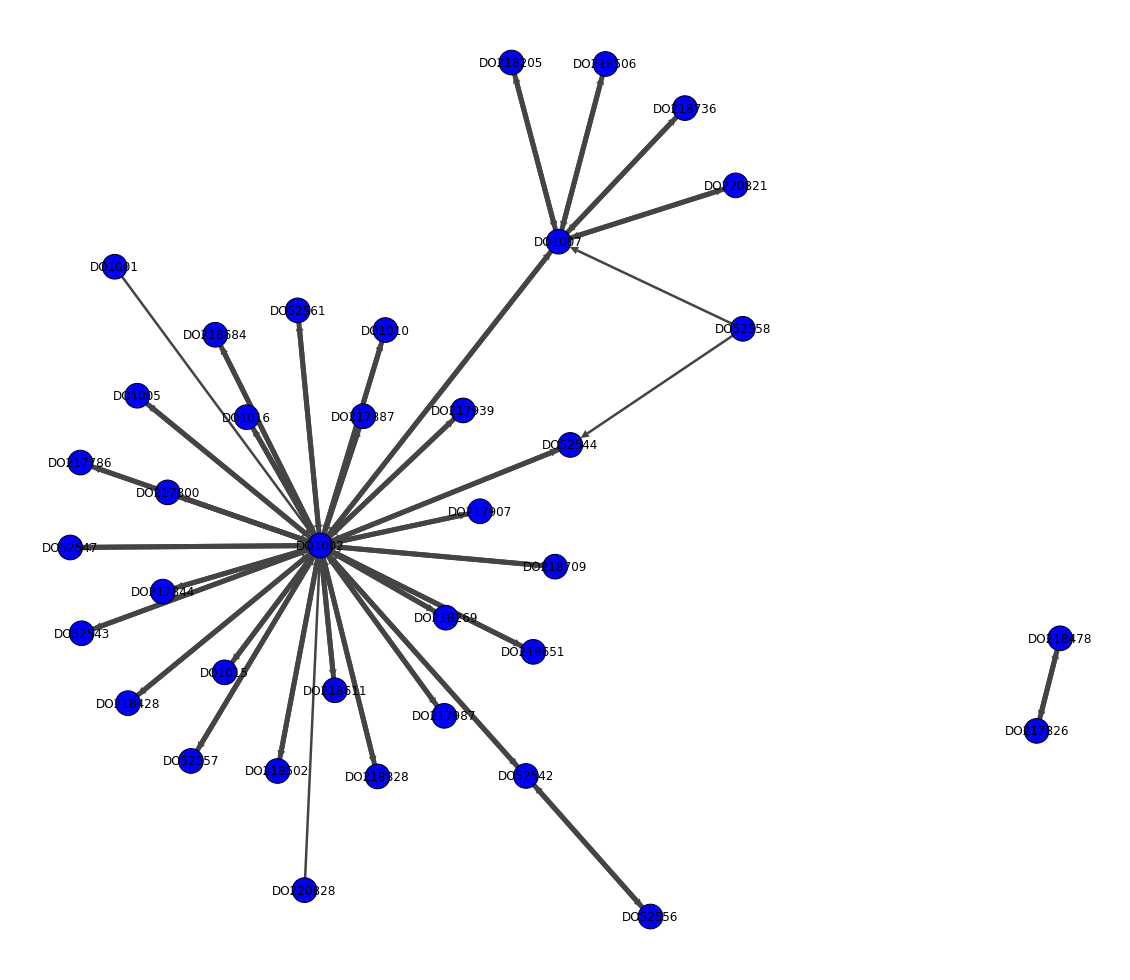

In [ ]:
breast_DiWANN = makeGraphEfficiently(len(breast_seq), breast_matrix, breast_donor_ID)
#print(breast_DiWANN.degree())
plt.figure(figsize=(20, 20))
igraph.plot(breast_DiWANN, target=plt.axes(), autocurve=False)

In [ ]:
Collection_tumor_gene = find_key_gene(breast_DiWANN, breast, dfs=True)
print(Collection_tumor_gene)
print(find_key_gene(breast_DiWANN, breast, dfs=False))
print(gen_key_gene_df(Collection_tumor_gene))

['DO1002', 'DO1005', 'DO1007', 'DO1010', 'DO1015', 'DO1016', 'DO217786', 'DO217800', 'DO217844', 'DO217887', 'DO217907', 'DO217939', 'DO217987', 'DO218205', 'DO218269', 'DO218428', 'DO218502', 'DO218506', 'DO218611', 'DO218651', 'DO218684', 'DO218709', 'DO218736', 'DO218828', 'DO220821', 'DO52542', 'DO52543', 'DO52544', 'DO52547', 'DO52556', 'DO52557', 'DO52561']
The top one key tumor gene: TP53
{'PTPRT': 2, 'TP53': 19, 'PIK3CA': 10, 'EGFR': 1, 'PTEN': 2, 'SMARCA4': 1, 'GRIN2A': 2, 'RB1': 1}
['DO1002', 'DO1005', 'DO1007', 'DO1010', 'DO1015', 'DO1016', 'DO217786', 'DO217800', 'DO217844', 'DO217887', 'DO217907', 'DO217939', 'DO217987', 'DO218269', 'DO218428', 'DO218502', 'DO218611', 'DO218651', 'DO218684', 'DO218709', 'DO218828', 'DO52542', 'DO52543', 'DO52544', 'DO52547', 'DO52557', 'DO52561']
The top one key tumor gene: TP53
{'PTPRT': 2, 'TP53': 16, 'PIK3CA': 6, 'EGFR': 1, 'PTEN': 1, 'GRIN2A': 1, 'RB1': 1}
    SYMBOL  SCORE
0    ptprt      2
1     tp53     19
2   pik3ca     10
3     eg

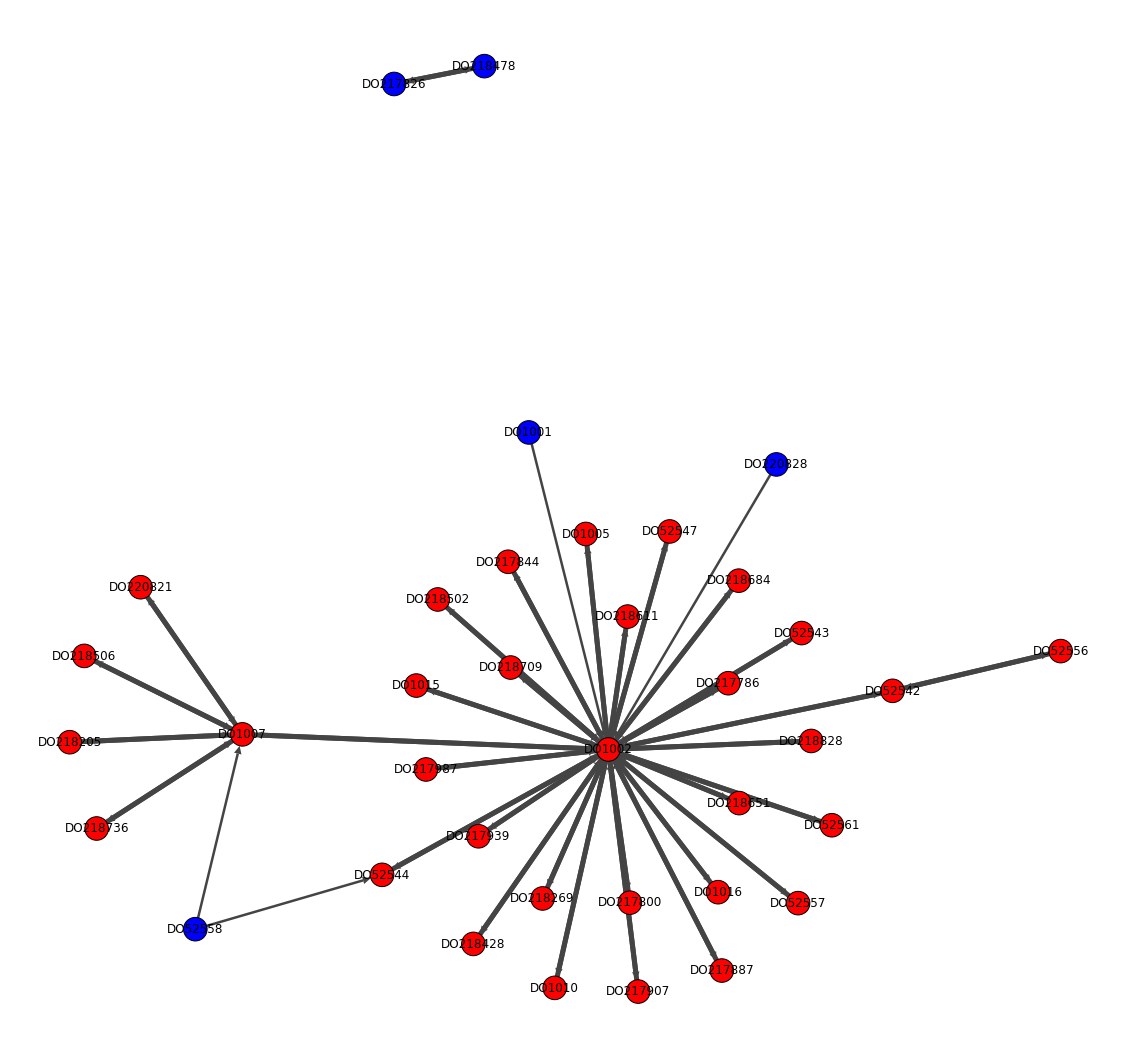

In [ ]:
plt.figure(figsize=(20, 20))
igraph.plot(breast_DiWANN, target=plt.axes(), autocurve=False)

In [ ]:
df = gen_key_gene_df(Collection_tumor_gene)
print(df)
df.to_csv('drive/MyDrive/Colab Notebooks/Breast_key_genes.csv', index=False)

    SYMBOL  SCORE
0    ptprt      2
1     tp53     19
2   pik3ca     10
3     egfr      1
4     pten      2
5  smarca4      1
6   grin2a      2
7      rb1      1


In [ ]:
breast_donorID_degree_df = make_donorID_degree_df(breast_donor_ID, breast_DiWANN.degree())
breast_donorID_degree_df

,Donor_ID,degree
0,DO1001,1
1,DO1002,54
2,DO1005,2
3,DO1007,11
4,DO1010,2
5,DO1015,2
6,DO1016,2
7,DO217786,2
8,DO217800,2
9,DO217826,2


In [ ]:
prost = merge_donor_seq_gene_tissue[merge_donor_seq_gene_tissue['tissue'].isin(['Prost'])]
prost_seq = prost['seq'].values.tolist()
prost_seq = convert_list_2d(prost_seq)
prost_donor_ID = prost['Donor_ID'].values.tolist()

In [ ]:
prost_matrix = createMinMatrix(prost_seq)
check_matrix_shape(prost_matrix)

Percent complete: 0.056
Percent complete: 0.108
Percent complete: 0.159
Percent complete: 0.208
Percent complete: 0.256
Percent complete: 0.302
Percent complete: 0.347
Percent complete: 0.39
Percent complete: 0.432
Percent complete: 0.472
Percent complete: 0.511
Percent complete: 0.548
Percent complete: 0.583
Percent complete: 0.617
Percent complete: 0.65
Percent complete: 0.681
Percent complete: 0.71
Percent complete: 0.738
Percent complete: 0.764
Percent complete: 0.789
Percent complete: 0.812
Percent complete: 0.833
Percent complete: 0.853
Percent complete: 0.872
Percent complete: 0.889
Percent complete: 0.904
Percent complete: 0.918
Percent complete: 0.931
Percent complete: 0.941
Percent complete: 0.951
Percent complete: 0.958
Percent complete: 0.965
Percent complete: 0.969
Percent complete: 0.972
Percent complete: 0.974
shape = (36, 36)


IGRAPH DNW- 36 519 -- 
+ attr: color (v), label (v), name (v), arrow_size (e), weight (e), width (e)


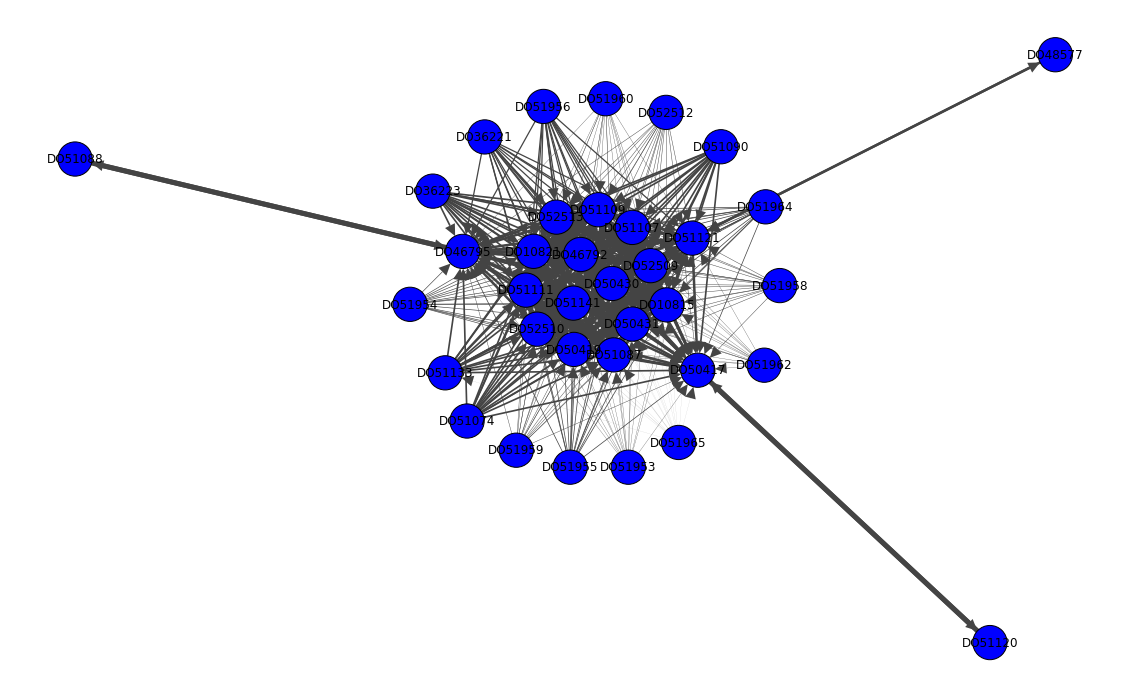

In [ ]:
prost_DiWANN = makeGraphEfficiently(len(prost_seq), prost_matrix, prost_donor_ID)
plt.figure(figsize=(20, 20))
igraph.plot(prost_DiWANN, target=plt.axes(), autocurve=False)

In [ ]:
Collection_tumor_gene = find_key_gene(prost_DiWANN, prost, dfs=True)
print(Collection_tumor_gene)
#Collection_tumor_gene = find_key_gene(prost_DiWANN, prost, dfs=False)
#print(Collection_tumor_gene)

['DO10815', 'DO10821', 'DO46792', 'DO46795', 'DO48577', 'DO50417', 'DO50419', 'DO50430', 'DO50431', 'DO51087', 'DO51088', 'DO51107', 'DO51109', 'DO51111', 'DO51120', 'DO51121', 'DO51141', 'DO52509', 'DO52510', 'DO52513']
The top one key tumor gene: GRIN2A
{'TP53': 3, 'GRIN2A': 10, 'SPOP': 4, 'KEAP1': 1, 'KMT2C': 4, 'PTPRT': 4, 'NF1': 1}


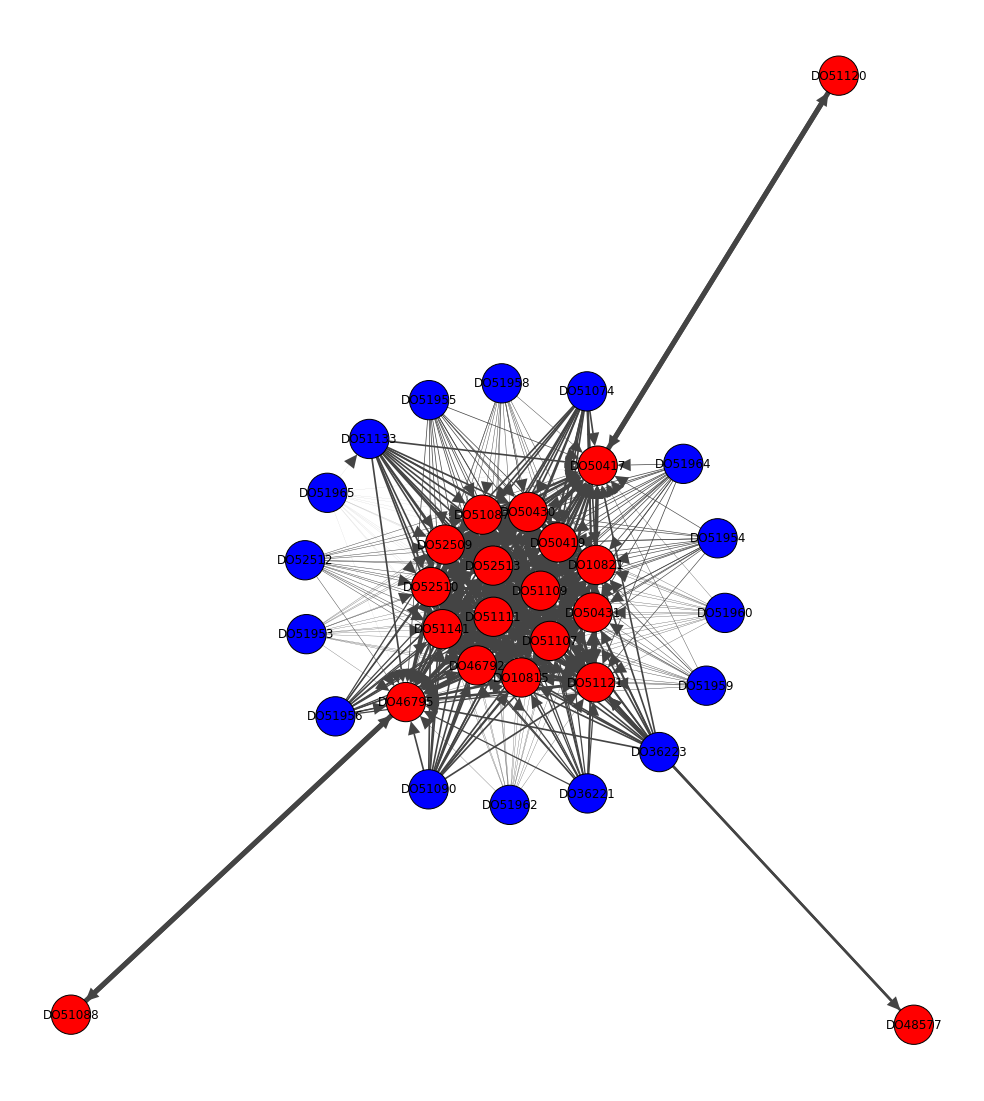

In [ ]:
plt.figure(figsize=(20, 20))
igraph.plot(prost_DiWANN, target=plt.axes(), autocurve=False)

In [ ]:
df = gen_key_gene_df(Collection_tumor_gene)
print(df)
df.to_csv('drive/MyDrive/Colab Notebooks/Prost_key_genes.csv', index=False)

   SYMBOL  SCORE
0    tp53      3
1  grin2a     10
2    spop      4
3   keap1      1
4   kmt2c      4
5   ptprt      4
6     nf1      1


In [ ]:
#Collection_tumor_gene = dict(Collection_tumor_gene)
#print(Collection_tumor_gene)
#Collection_tumor_gene = pd.DataFrame(Collection_tumor_gene)
list_symbol = [s.lower() for s in list(Collection_tumor_gene.keys())]
print(list_symbol)
tumor_gene_dict = {"SYMBOL":list_symbol, "SCORE":list(Collection_tumor_gene.values())}
print(tumor_gene_dict)

['tp53', 'grin2a', 'spop', 'keap1', 'kmt2c', 'ptprt', 'nf1']
{'SYMBOL': ['tp53', 'grin2a', 'spop', 'keap1', 'kmt2c', 'ptprt', 'nf1'], 'SCORE': [3, 10, 4, 1, 4, 4, 1]}


In [ ]:
tumor_gene_df = pd.DataFrame(tumor_gene_dict)
print(tumor_gene_df)

   SYMBOL  SCORE
0    tp53      3
1  grin2a     10
2    spop      4
3   keap1      1
4   kmt2c      4
5   ptprt      4
6     nf1      1


In [ ]:
prost_donorID_degree_df = make_donorID_degree_df(prost_donor_ID, prost_DiWANN.degree())
prost_donorID_degree_df

,Donor_ID,degree
0,DO10815,46
1,DO10821,46
2,DO36221,17
3,DO36223,17
4,DO46792,46
5,DO46795,33
6,DO48577,2
7,DO50417,33
8,DO50419,46
9,DO50430,46


In [ ]:
print(prost)

    Donor_ID                                                seq  seq_len  \
7    DO10815  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
8    DO10821  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
221  DO36221  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
222  DO36223  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
285  DO46792  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
286  DO46795  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
292  DO48577  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
356  DO50417  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
357  DO50419  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
358  DO50430  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
359  DO50431  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
375  DO51074  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
376  DO51087

In [ ]:
test = merge_donor_seq_gene_tissue[merge_donor_seq_gene_tissue['tissue'].isin(['Breast', 'Prost'])]
test.drop(index=test[test.Donor_ID=='DO1002'].index.tolist()[0], axis=0, inplace=True)
print(test)

    Donor_ID                                                seq  seq_len  \
0     DO1001  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
2     DO1005  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
3     DO1007  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
4     DO1010  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
5     DO1015  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
..       ...                                                ...      ...   
441  DO52547  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
442  DO52556  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
443  DO52557  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
444  DO52558  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
445  DO52561  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   

        tumor_gene_uni  tissue  
0         GRIN2A, TP53  Breast  
2                 TP5

In [ ]:
test_seq = test['seq'].values.tolist()
test_seq = convert_list_2d(test_seq)
test_donor_ID = test['Donor_ID'].values.tolist()
test_matrix = createMinMatrix(test_seq)
check_matrix_shape(test_matrix)

Percent complete: 0.028
Percent complete: 0.055
Percent complete: 0.081
Percent complete: 0.108
Percent complete: 0.133
Percent complete: 0.159
Percent complete: 0.184
Percent complete: 0.209
Percent complete: 0.233
Percent complete: 0.257
Percent complete: 0.28
Percent complete: 0.304
Percent complete: 0.326
Percent complete: 0.349
Percent complete: 0.371
Percent complete: 0.392
Percent complete: 0.414
Percent complete: 0.434
Percent complete: 0.455
Percent complete: 0.475
Percent complete: 0.495
Percent complete: 0.514
Percent complete: 0.533
Percent complete: 0.551
Percent complete: 0.569
Percent complete: 0.587
Percent complete: 0.605
Percent complete: 0.622
Percent complete: 0.638
Percent complete: 0.654
Percent complete: 0.67
Percent complete: 0.686
Percent complete: 0.701
Percent complete: 0.715
Percent complete: 0.73
Percent complete: 0.743
Percent complete: 0.757
Percent complete: 0.77
Percent complete: 0.783
Percent complete: 0.795
Percent complete: 0.807
Percent complete: 0.

IGRAPH DNW- 72 2183 -- 
+ attr: label (v), name (v), arrow_size (e), weight (e), width (e)


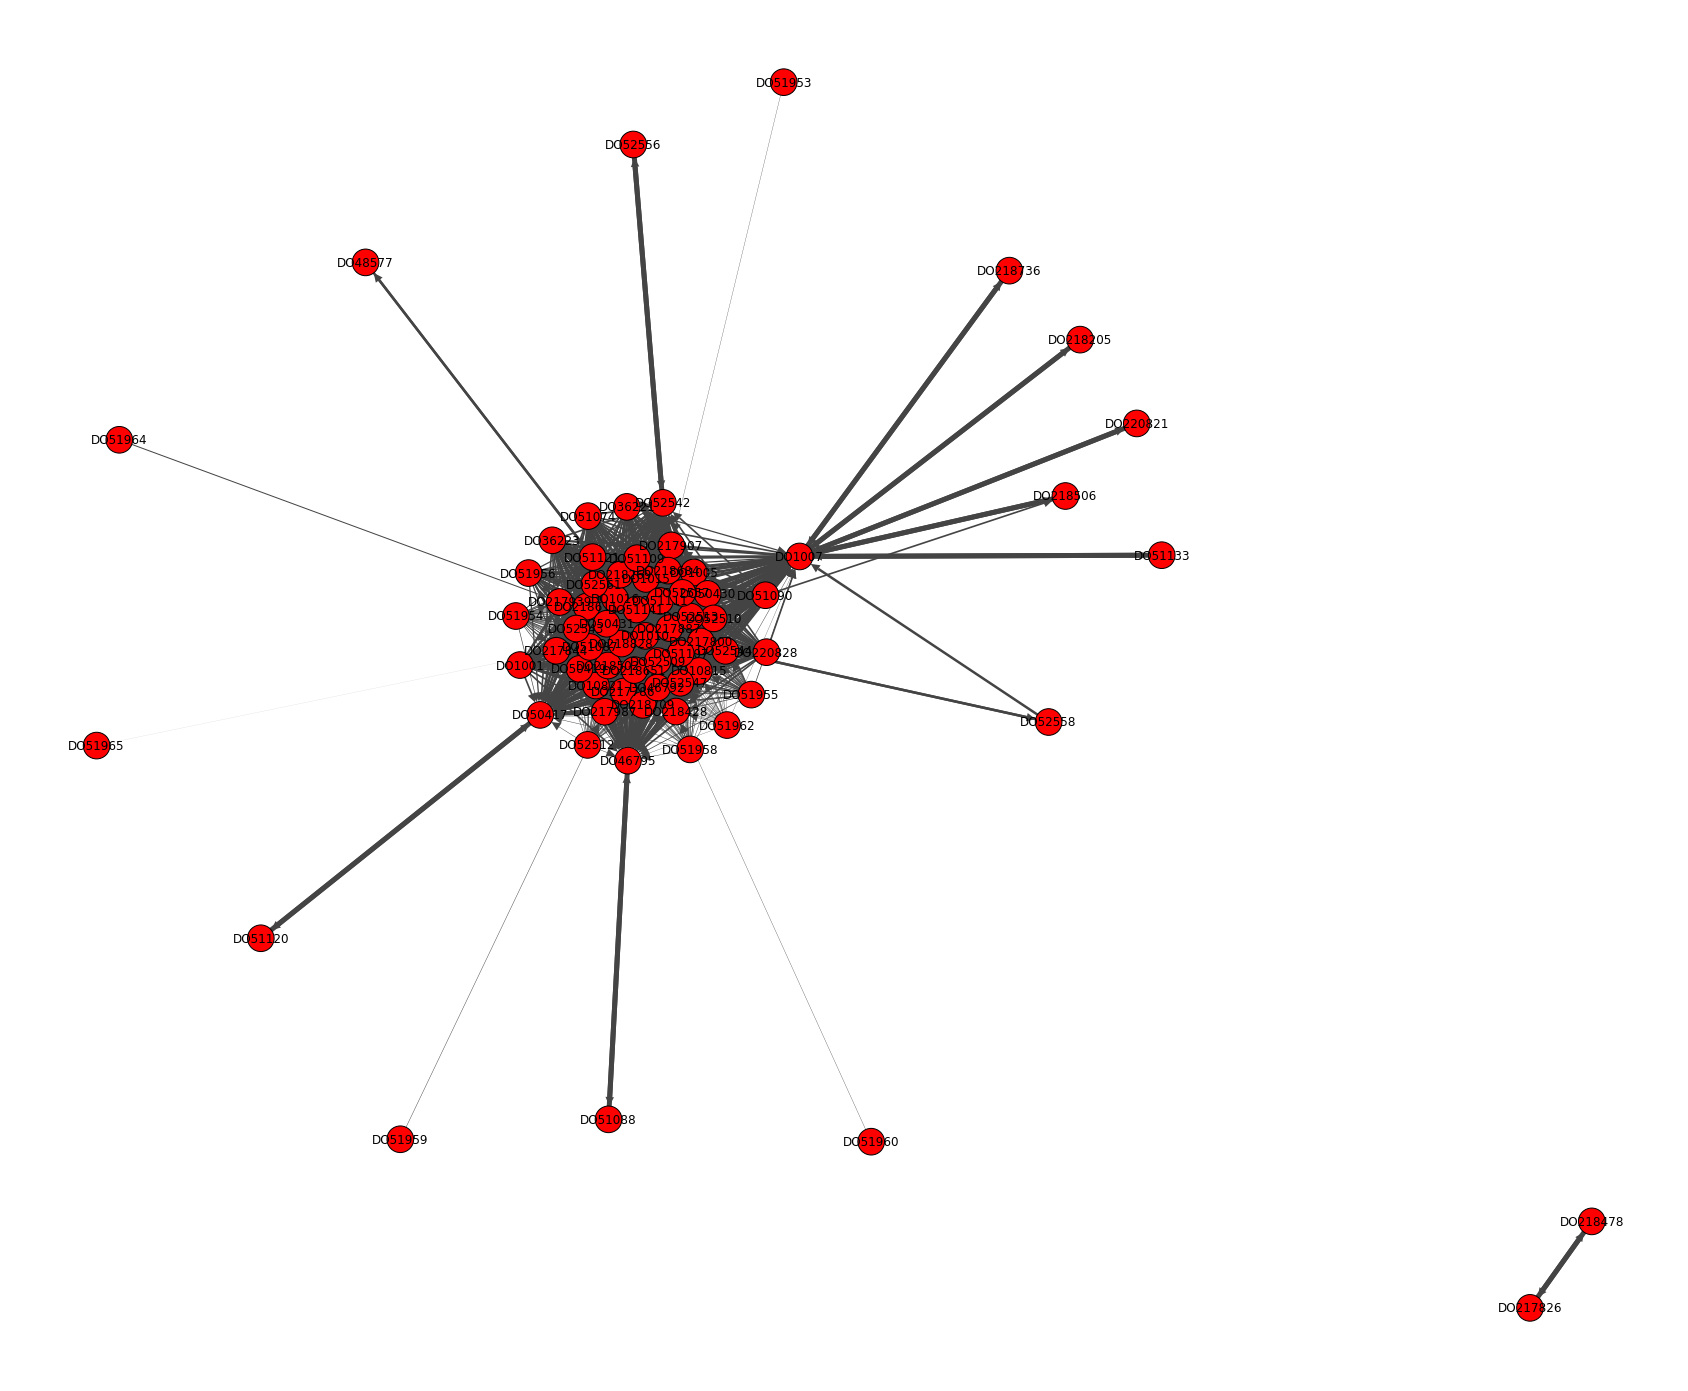

In [ ]:
test_DiWANN = makeGraphEfficiently(len(test_seq), test_matrix, test_donor_ID)
plt.figure(figsize=(30, 30))
igraph.plot(test_DiWANN, target=plt.axes(), autocurve=False)

In [ ]:
test_donorID_degree_df = make_donorID_degree_df(test_donor_ID, test_DiWANN.degree())
print(test_donorID_degree_df)

   Donor_ID  degree
0    DO1001      43
1    DO1005      92
2    DO1007      62
3    DO1010      92
4    DO1015      92
..      ...     ...
67  DO52547      92
68  DO52556       2
69  DO52557      92
70  DO52558       3
71  DO52561      92

[72 rows x 2 columns]


In [ ]:
eso = merge_donor_seq_gene_tissue[merge_donor_seq_gene_tissue['tissue'].isin(['Eso'])]
eso_seq = eso['seq'].values.tolist()
eso_seq = convert_list_2d(eso_seq)
eso_donor_ID = eso['Donor_ID'].values.tolist()

In [ ]:
print(eso)

    Donor_ID                                                seq  seq_len  \
9    DO10839  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      772   
10   DO10840  GTGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAAT...      774   
11   DO10841  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
12   DO10843  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
13   DO10858  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      772   
325  DO50311  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
326  DO50314  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
327  DO50316  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
328  DO50321  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      772   
329  DO50323  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
330  DO50325  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
331  DO50326  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGTATAATGAATC...      773   
332  DO50328

In [ ]:
eso_matrix = createMinMatrix(eso_seq)
check_matrix_shape(eso_matrix)

Percent complete: 0.047
Percent complete: 0.091
Percent complete: 0.134
Percent complete: 0.176
Percent complete: 0.217
Percent complete: 0.257
Percent complete: 0.296
Percent complete: 0.334
Percent complete: 0.371
Percent complete: 0.407
Percent complete: 0.441
Percent complete: 0.475
Percent complete: 0.507
Percent complete: 0.539
Percent complete: 0.569
Percent complete: 0.598
Percent complete: 0.626
Percent complete: 0.653
Percent complete: 0.679
Percent complete: 0.704
Percent complete: 0.728
Percent complete: 0.751
Percent complete: 0.772
Percent complete: 0.793
Percent complete: 0.812
Percent complete: 0.831
Percent complete: 0.848
Percent complete: 0.864
Percent complete: 0.879
Percent complete: 0.893
Percent complete: 0.906
Percent complete: 0.918
Percent complete: 0.929
Percent complete: 0.939
Percent complete: 0.948
Percent complete: 0.955
Percent complete: 0.962
Percent complete: 0.967
Percent complete: 0.971
Percent complete: 0.975
Percent complete: 0.977
Percent complete

IGRAPH DNW- 43 320 -- 
+ attr: color (v), label (v), name (v), arrow_size (e), weight (e), width (e)


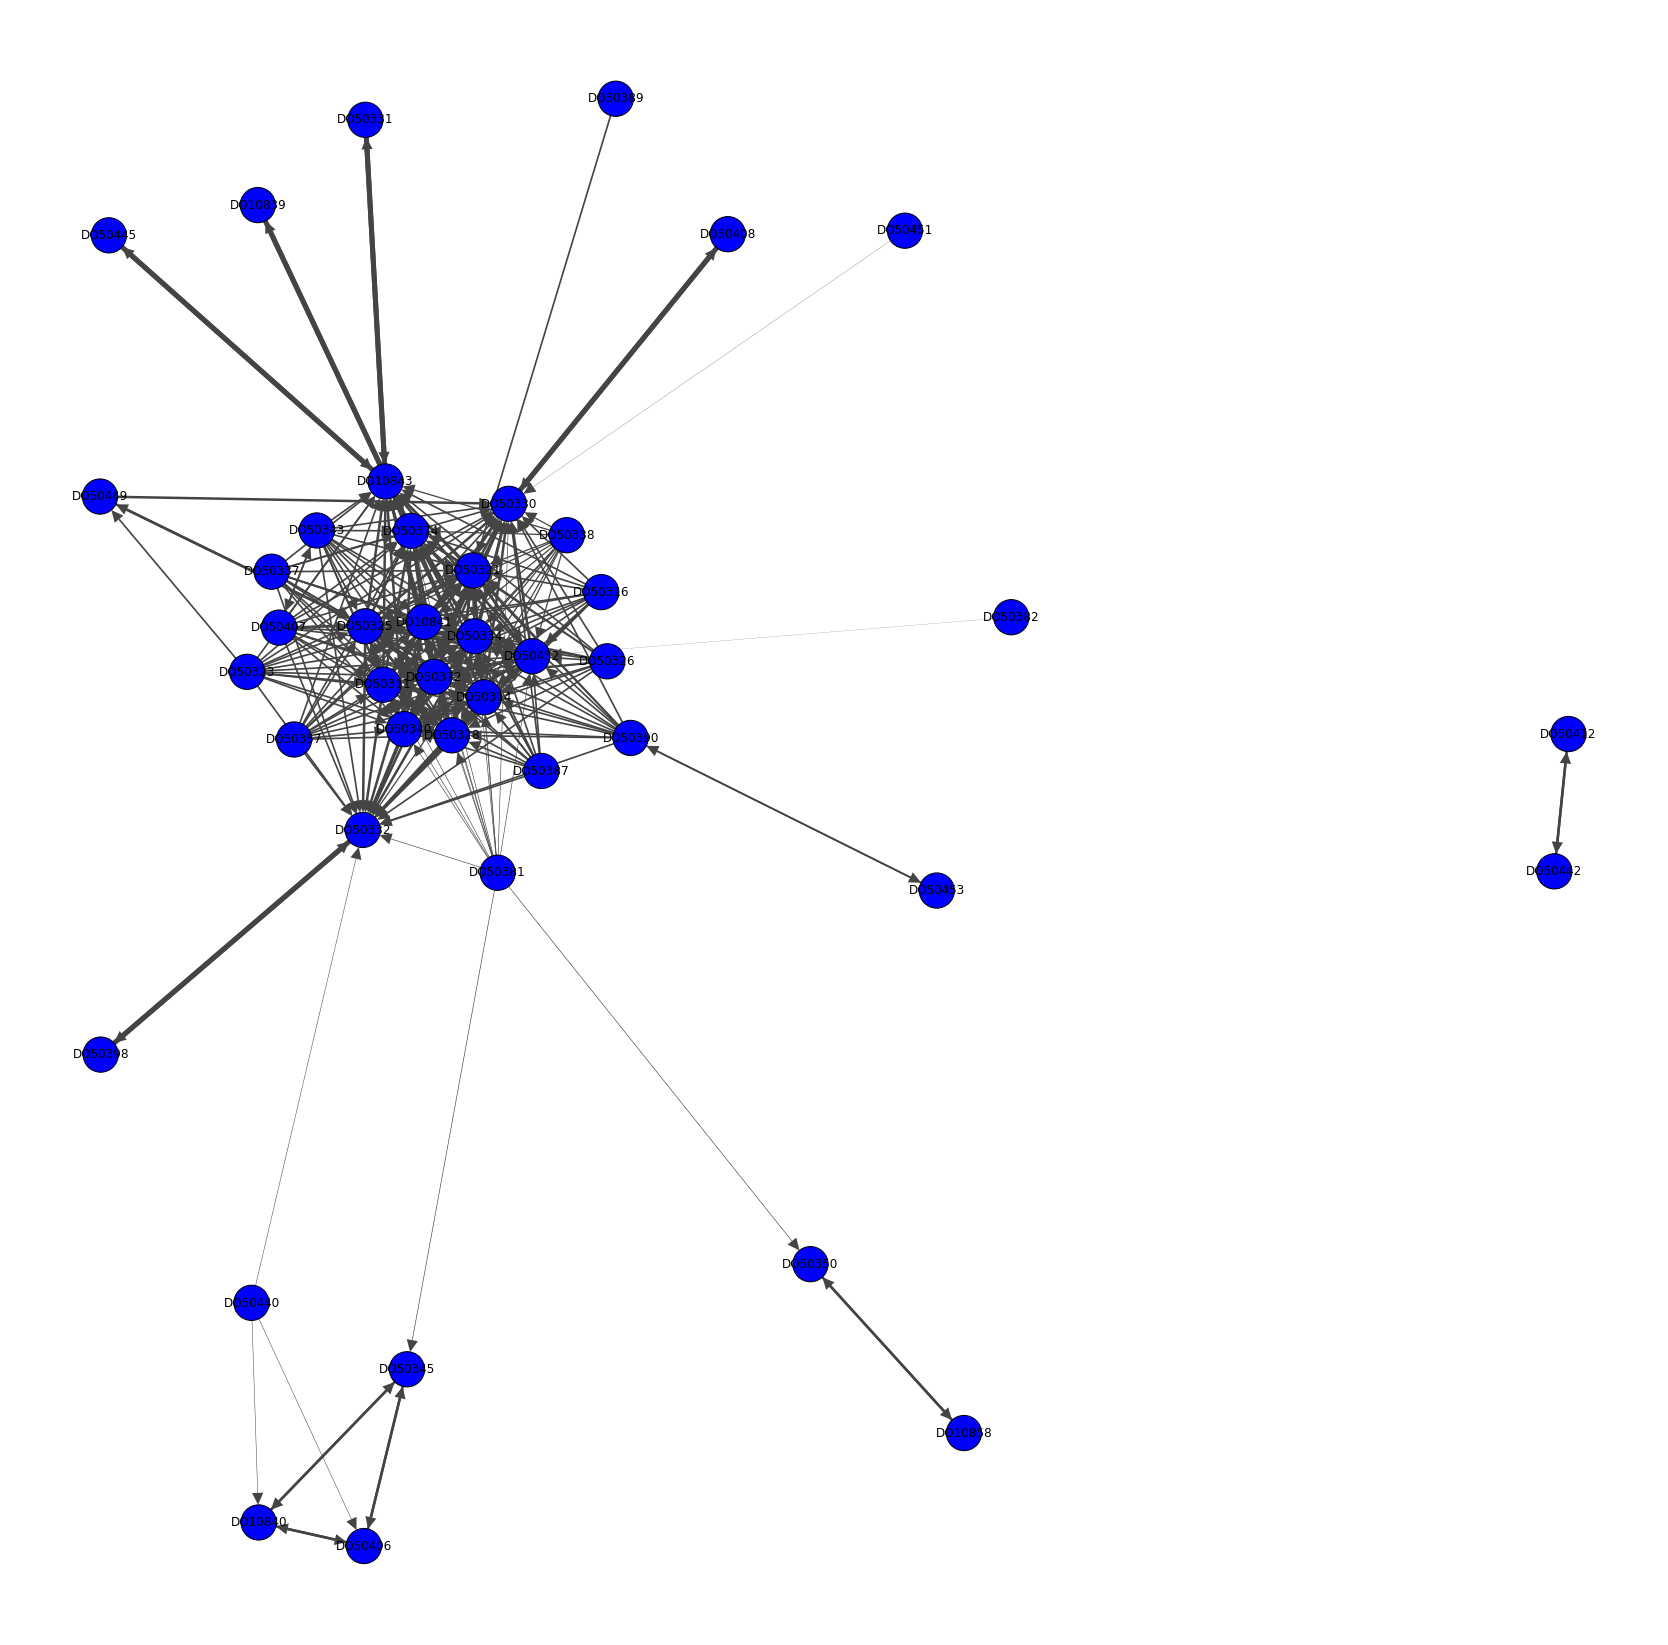

In [ ]:
eso_DiWANN = makeGraphEfficiently(len(eso_seq), eso_matrix, eso_donor_ID)
plt.figure(figsize=(30, 30))
igraph.plot(eso_DiWANN, target=plt.axes(), autocurve=False)

In [ ]:
Collection_tumor_gene = find_key_gene(eso_DiWANN, eso, dfs=True)
print(Collection_tumor_gene)
print(find_key_gene(eso_DiWANN, eso, dfs=False))
print(gen_key_gene_df(Collection_tumor_gene))

['DO10839', 'DO10841', 'DO10843', 'DO50311', 'DO50314', 'DO50321', 'DO50325', 'DO50328', 'DO50330', 'DO50331', 'DO50332', 'DO50334', 'DO50340', 'DO50372', 'DO50374', 'DO50398', 'DO50408', 'DO50445', 'DO50449', 'DO50452']
The top one key tumor gene: PTPRT
{'RB1': 2, 'TP53': 15, 'PTPRT': 17, 'GRIN2A': 1, 'CDKN2A': 4, 'MSH6': 1, 'PTEN': 1, 'EGFR': 1, 'PIK3CA': 1, 'ARID1A': 1}
['DO10841', 'DO10843', 'DO50311', 'DO50314', 'DO50321', 'DO50325', 'DO50328', 'DO50330', 'DO50331', 'DO50332', 'DO50334', 'DO50340', 'DO50372', 'DO50374', 'DO50445', 'DO50449', 'DO50452']
The top one key tumor gene: PTPRT
{'PTPRT': 15, 'TP53': 12, 'GRIN2A': 1, 'CDKN2A': 2, 'MSH6': 1, 'PTEN': 1, 'RB1': 1, 'EGFR': 1, 'PIK3CA': 1, 'ARID1A': 1}
   SYMBOL  SCORE
0     rb1      2
1    tp53     15
2   ptprt     17
3  grin2a      1
4  cdkn2a      4
5    msh6      1
6    pten      1
7    egfr      1
8  pik3ca      1
9  arid1a      1


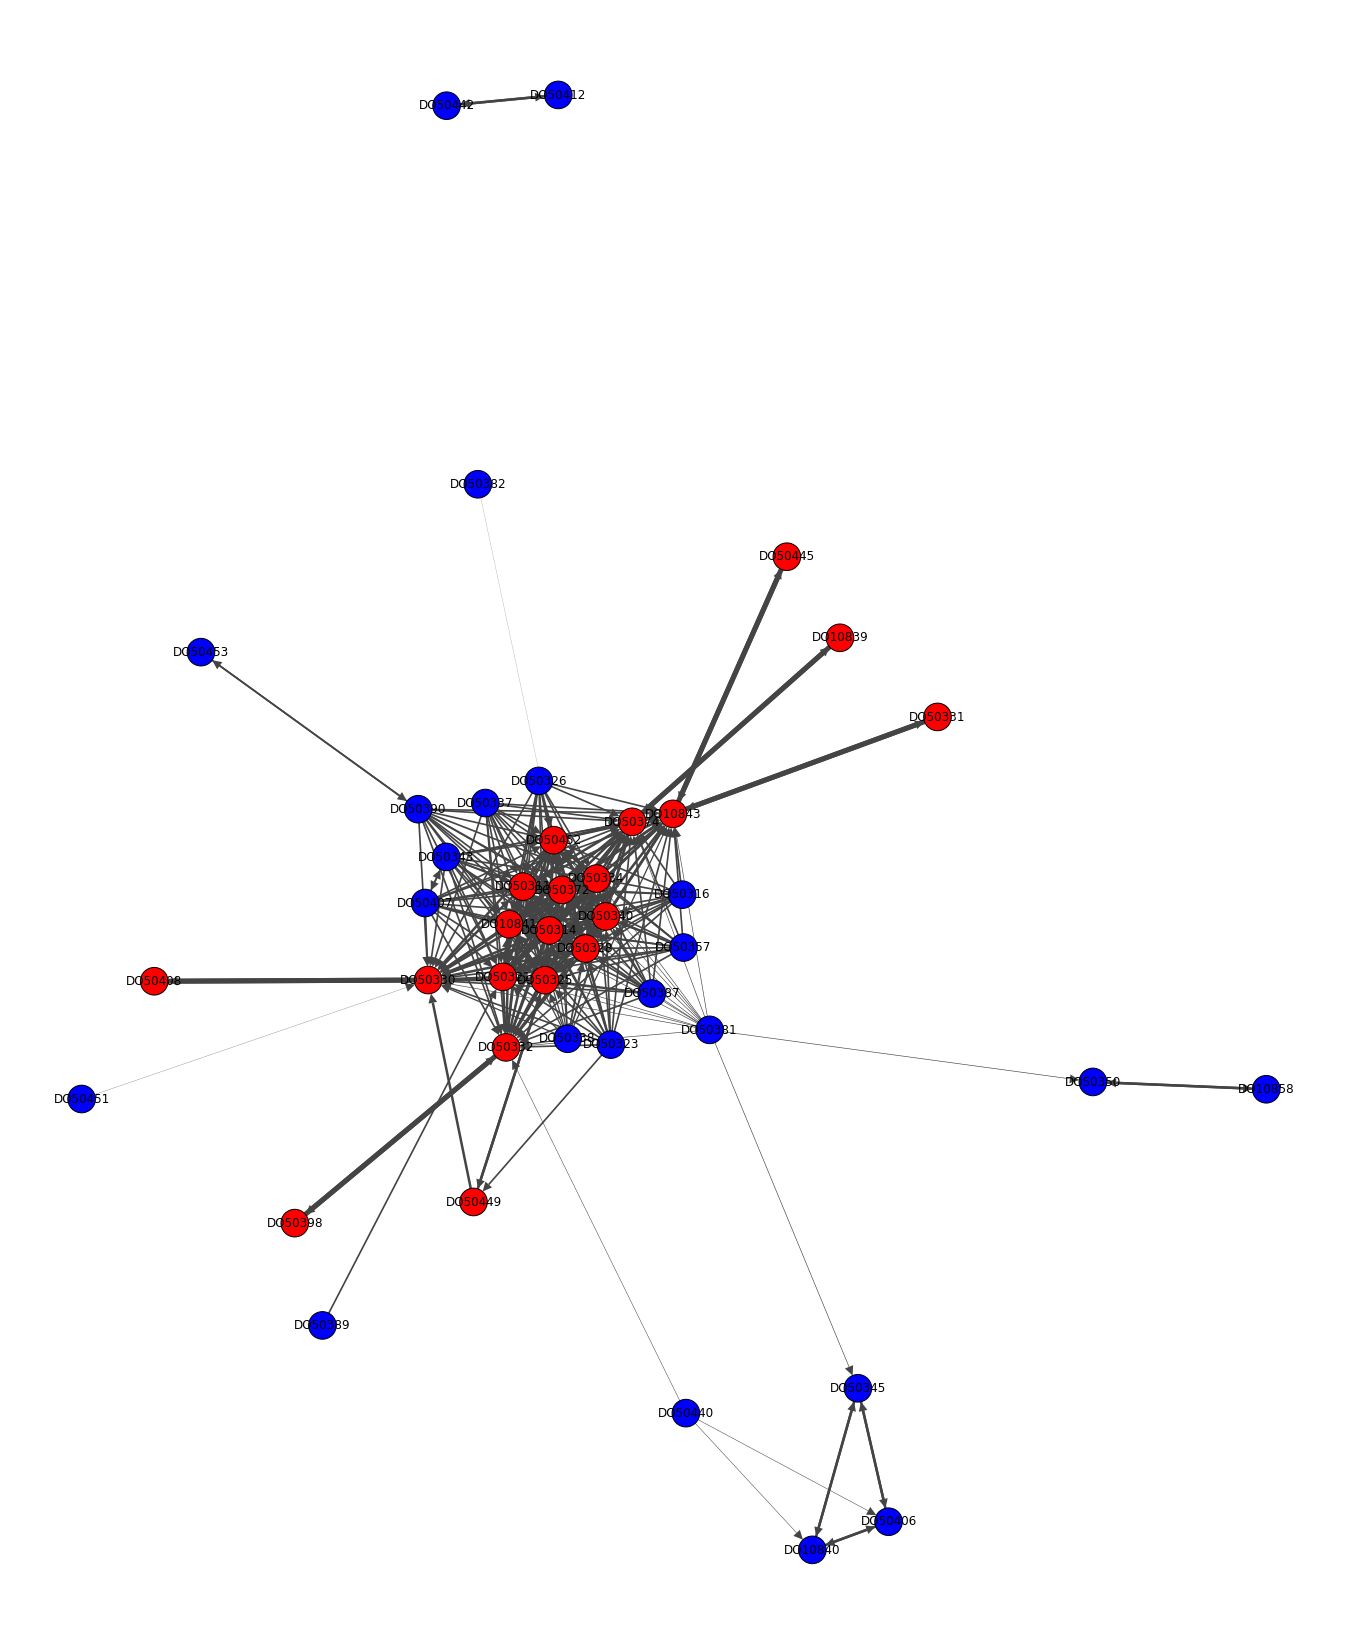

In [ ]:
plt.figure(figsize=(30, 30))
igraph.plot(eso_DiWANN, target=plt.axes(), autocurve=False)

In [ ]:
df = gen_key_gene_df(Collection_tumor_gene)
df.to_csv('drive/MyDrive/Colab Notebooks/Eso_key_genes.csv', index=False)

In [ ]:
head = merge_donor_seq_gene_tissue[merge_donor_seq_gene_tissue['tissue'].isin(['Head'])]
head_seq = head['seq'].values.tolist()
head_seq = convert_list_2d(head_seq)
head_donor_ID = head['Donor_ID'].values.tolist()

In [ ]:
print(head)

    Donor_ID                                                seq  seq_len  \
20  DO217836  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
26  DO217950  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
31  DO218075  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
35  DO218180  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
40  DO218280  TAGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
41  DO218306  TGGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   
58  DO218697  TAGCGGAGCCGGCAGCGGCGGCGGGCCCGGCGCCGCATAATGAATC...      773   

         tumor_gene_uni tissue  
20               PIK3CA   Head  
26       CDKN2A, PIK3CA   Head  
31                 TP53   Head  
35  KRAS, PIK3CA, PTPRT   Head  
40    ARID1A, NF1, TP53   Head  
41          PTPRT, TP53   Head  
58       ARID1A, CDKN2A   Head  


In [ ]:
head_matrix = createMinMatrix(head_seq)
check_matrix_shape(head_matrix)

Percent complete: 0.286
Percent complete: 0.49
Percent complete: 0.653
Percent complete: 0.776
Percent complete: 0.857
Percent complete: 0.898
shape = (7, 7)


IGRAPH DNW- 7 12 -- 
+ attr: color (v), label (v), name (v), arrow_size (e), weight (e), width (e)


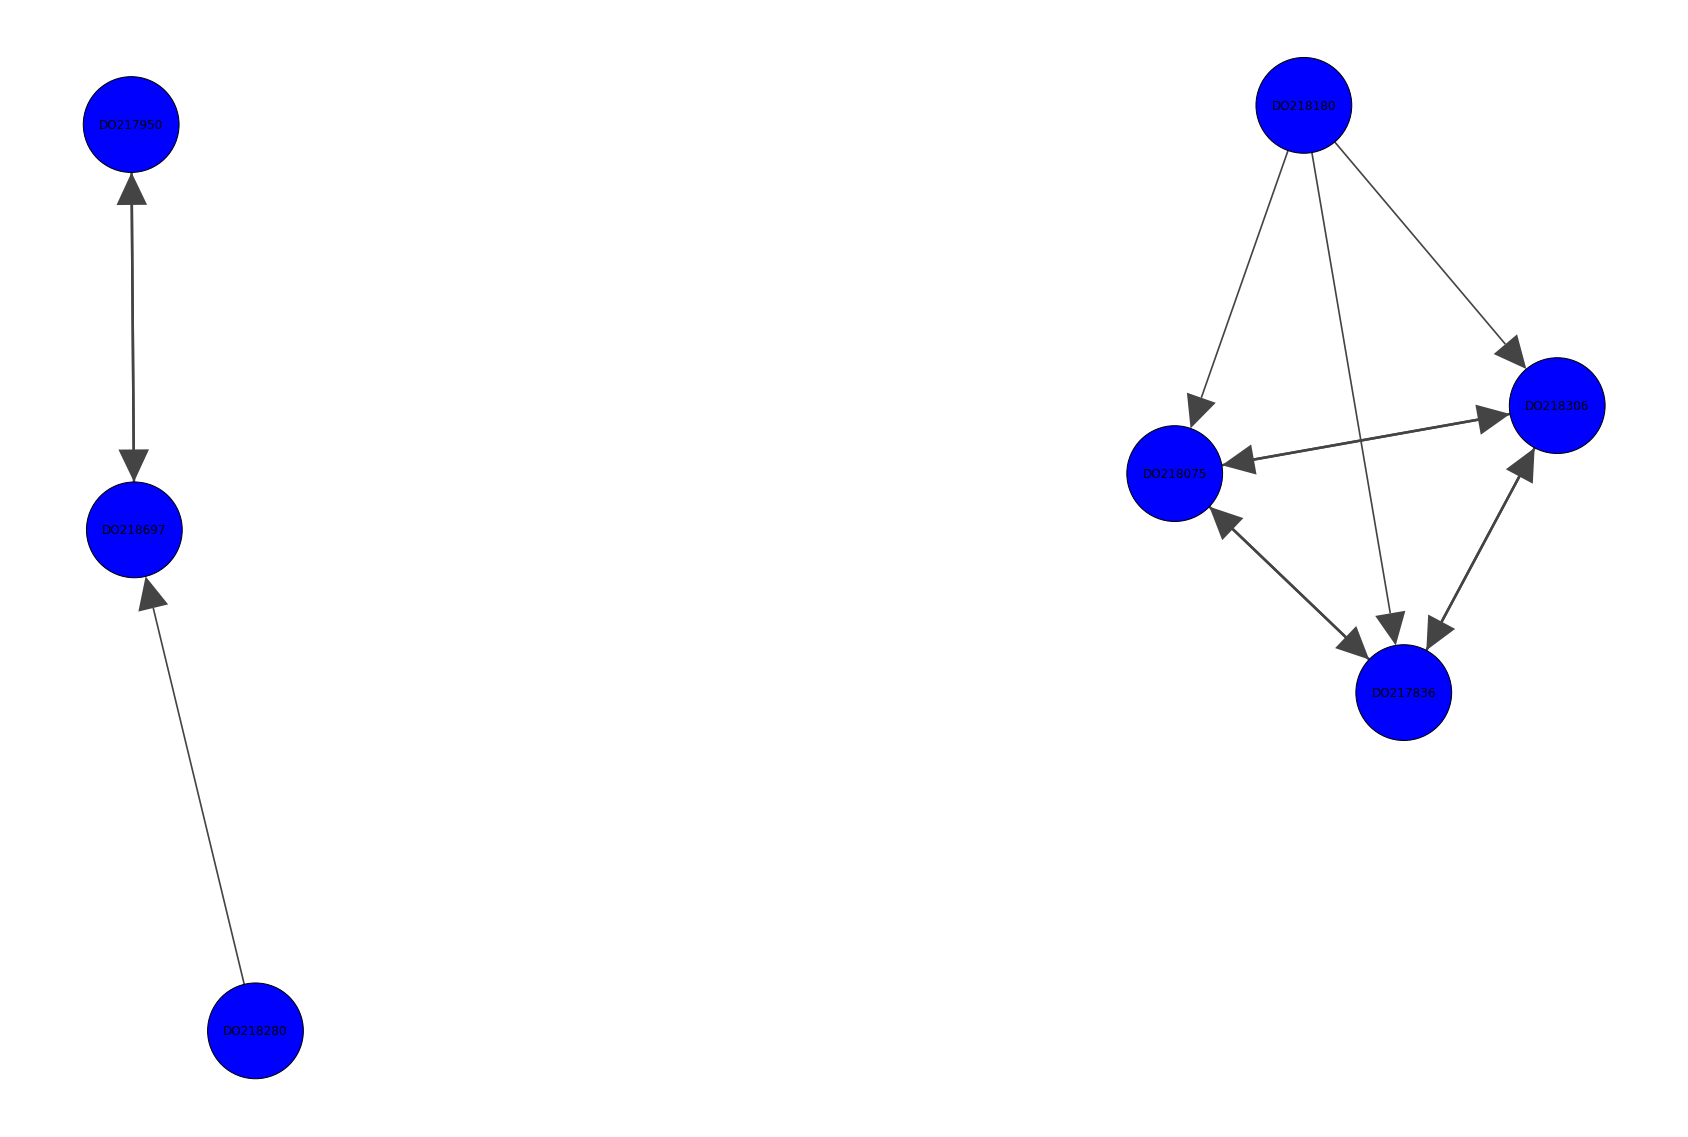

In [ ]:
head_DiWANN = makeGraphEfficiently(len(head_seq), head_matrix, head_donor_ID)
plt.figure(figsize=(30, 30))
igraph.plot(head_DiWANN, target=plt.axes(), autocurve=False)

In [ ]:
Collection_tumor_gene = find_key_gene(head_DiWANN, head, dfs=True)
print(Collection_tumor_gene)
print(find_key_gene(head_DiWANN, head, dfs=False))
print(gen_key_gene_df(Collection_tumor_gene))

['DO217836', 'DO217950', 'DO218075', 'DO218306', 'DO218697']
The top one key tumor gene: PIK3CA
{'PIK3CA': 2, 'CDKN2A': 2, 'TP53': 2, 'PTPRT': 1, 'ARID1A': 1}
['DO217836', 'DO217950', 'DO218075', 'DO218306', 'DO218697']
The top one key tumor gene: PIK3CA
{'PIK3CA': 2, 'CDKN2A': 2, 'TP53': 2, 'PTPRT': 1, 'ARID1A': 1}
   SYMBOL  SCORE
0  pik3ca      2
1  cdkn2a      2
2    tp53      2
3   ptprt      1
4  arid1a      1


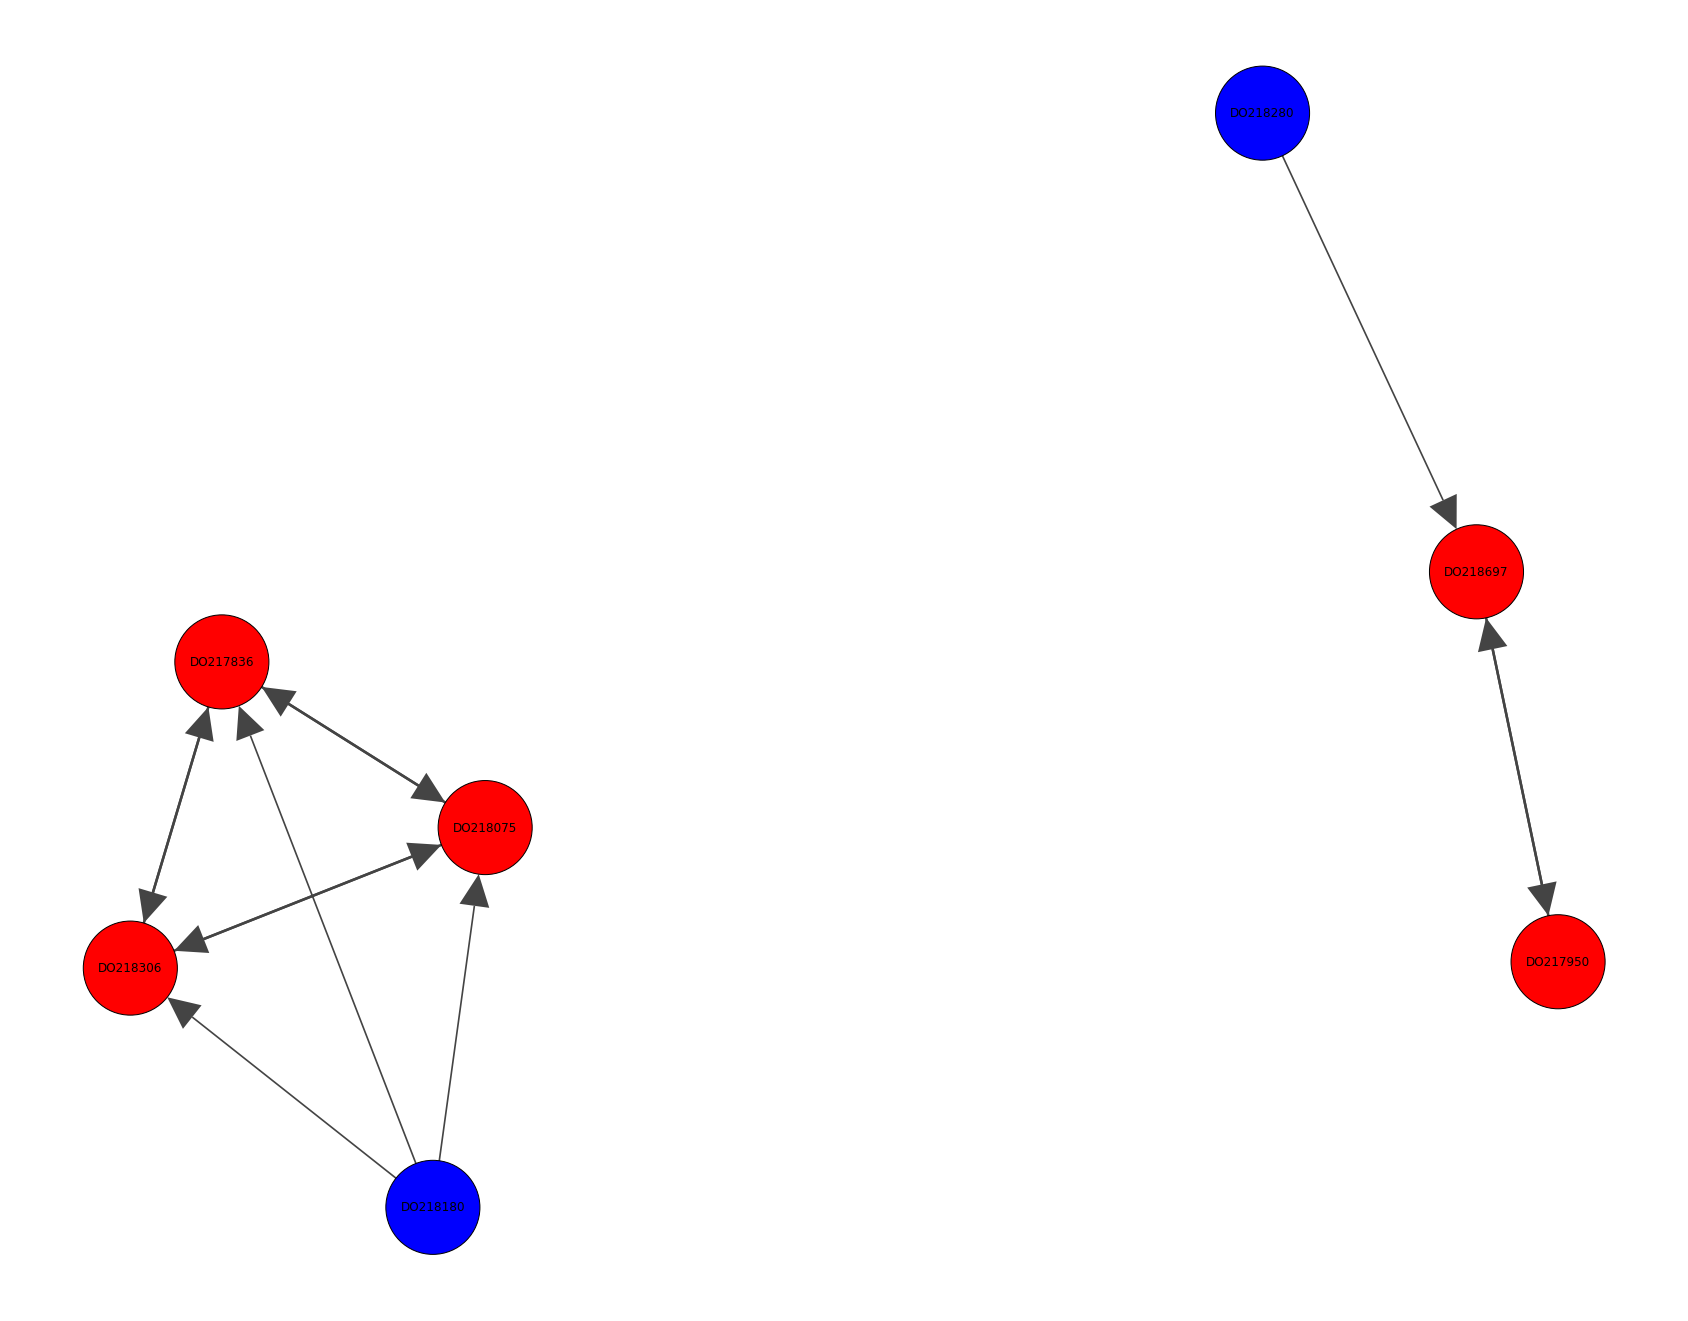

In [ ]:
plt.figure(figsize=(30, 30))
igraph.plot(head_DiWANN, target=plt.axes(), autocurve=False)

In [ ]:
df = gen_key_gene_df(Collection_tumor_gene)
df.to_csv('drive/MyDrive/Colab Notebooks/Head_key_genes.csv', index=False)